In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [79]:
data = {
    'ES012': [2, 3, 4, 5, None, 6, 7, None, 1, 10],
    'FN035': [1000, None, 2000, None, 4000, 1000, 2000, 3000, 4000, 5000],
    'ES015': [19, 24, 10, 10, 20, 30, 40, None, 30, 10],
    'EX311': ['JP', 'CN', 'EN', 'JP', 'CN', 'JP', 'JP', 'JP', 'JP', 'JP'],
    'sector': ['finance', 'automobile', 'semiconductor', 'oil', 'insurance', 'automobile', 'automobile', 'insurance', 'insurance', 'oil']
}
df = pd.DataFrame(data)

sectors_list = sorted(df['sector'].unique())

In [68]:
df_jp = df[df['EX311'] == 'JP']   # select only the japan data
numeric_cols = df_jp.select_dtypes(include=['number']).columns.tolist()   # select the numeric cols

In [96]:
# draw box plot for each feature for certain sector - this produces each boxplot one by one
def box_by_sector(df, sector):
    for col in numeric_cols:
        # drop null data
        df_tmp = df_jp[df_jp['sector'] == sector]
        data_clean = df_tmp[col].dropna()
     
        plt.figure(figsize=(6, 8))
        
        # Boxplot with stripplot
        sns.boxplot(y=data_clean, showfliers=False, boxprops={'alpha': 0.3})
        sns.stripplot(y=data_clean, jitter=True, marker='x', color='black', size=8, linewidth=1)
        
        # Title for the plot
        plt.title(f'Boxplot of {col} in {sector} with All Points as Crosses')
        plt.show()




C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\categorical.py:299: UserWarning: You passed a edgecolor/edgecolors ('gray') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)


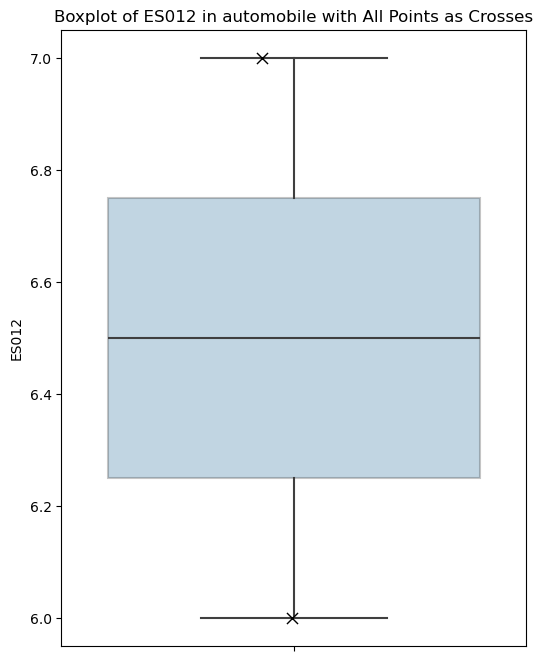

C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\categorical.py:299: UserWarning: You passed a edgecolor/edgecolors ('gray') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)


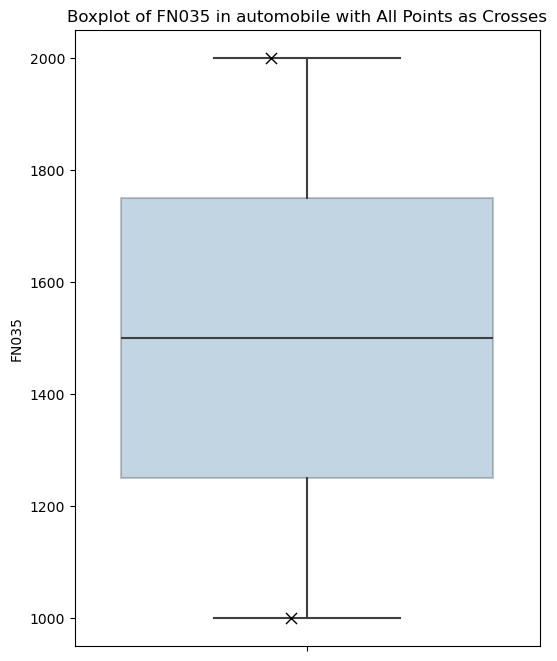

C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\categorical.py:299: UserWarning: You passed a edgecolor/edgecolors ('gray') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)


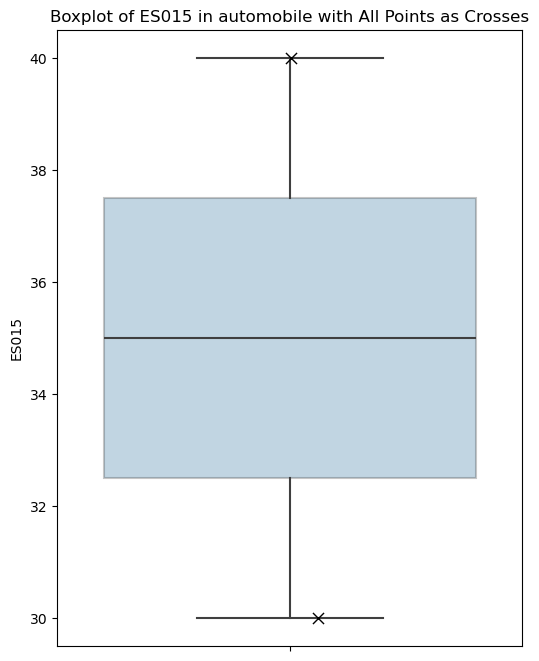

In [98]:
box_by_sector(df_jp, 'automobile')

C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\categorical.py:299: UserWarning: You passed a edgecolor/edgecolors ('gray') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
C:\Users\kosei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

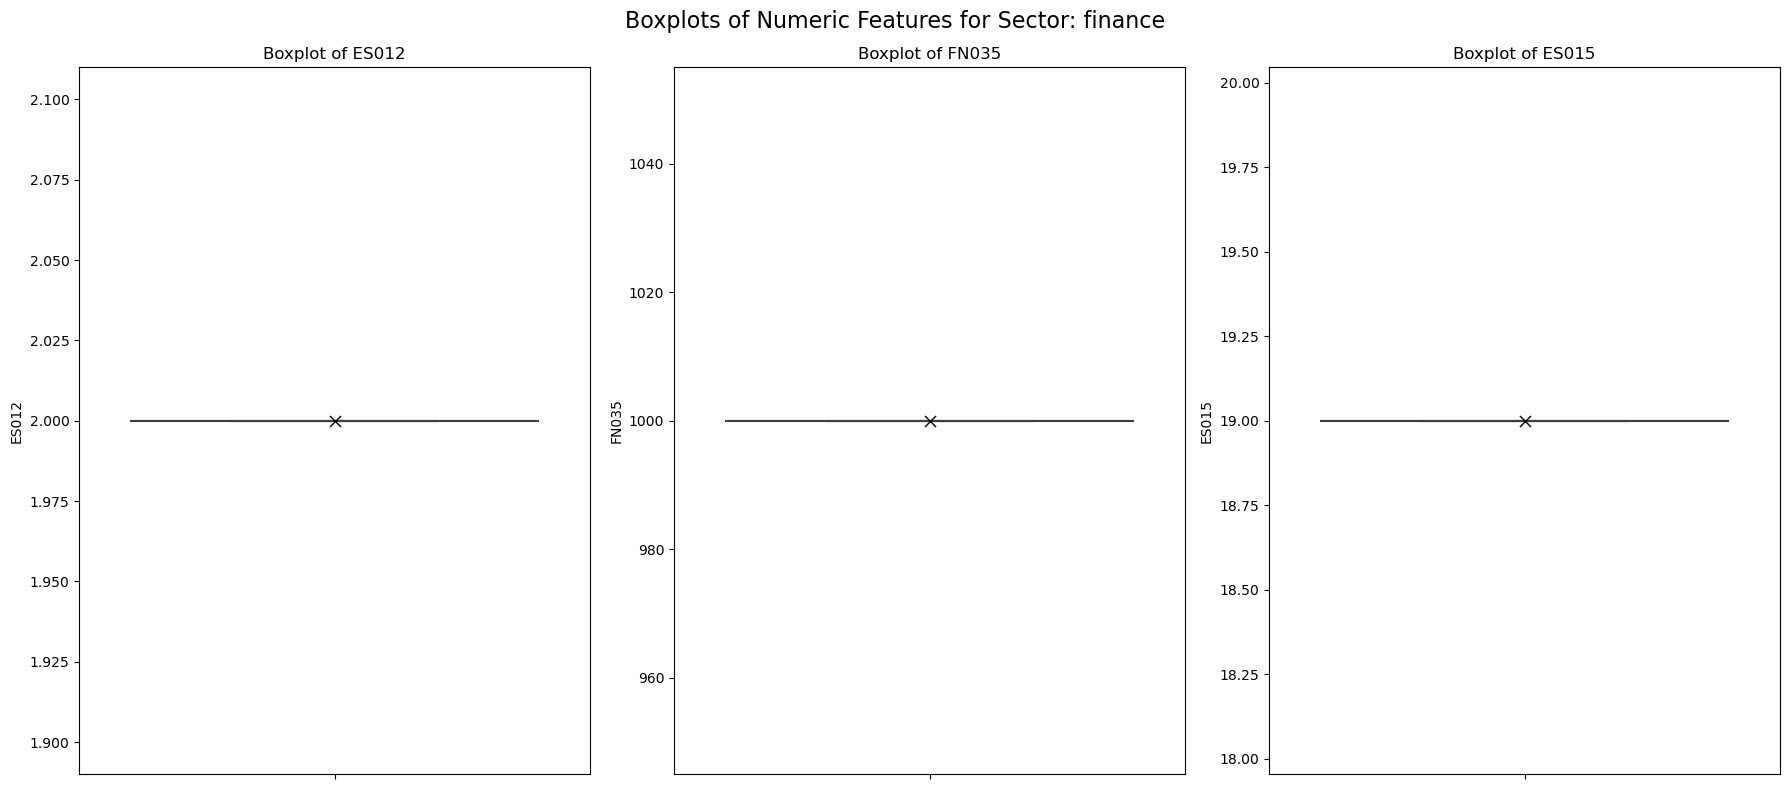

In [99]:
# draw box plot for each feature for certain sector - this puts all the boxplots in one picture
def box_by_sector_align(df, sector):
    df_tmp = df[df['sector'] == sector]
    
    num_cols = len(numeric_cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 6, 8))
    
    for i, col in enumerate(numeric_cols):
        data_clean = df_tmp[col].dropna()
        
        sns.boxplot(y=data_clean, showfliers=False, boxprops={'alpha': 0.3}, ax=axes[i])
        sns.stripplot(y=data_clean, jitter=True, marker='x', color='black', size=8, linewidth=1, ax=axes[i])
        
        axes[i].set_title(f'Boxplot of {col}')
    
    fig.suptitle(f'Boxplots of Numeric Features for Sector: {sector}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
box_by_sector(df, 'finance')

In [83]:
def compare_by_sector(df, col):
    df_filtered = df[['sector', col]].dropna()

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sector', y=col, data=df_filtered, linewidth=1)
    plt.xlabel('Sectors')
    plt.ylabel(col)
    plt.title(f'Comparison of {col} by Sector')
    plt.show()



    

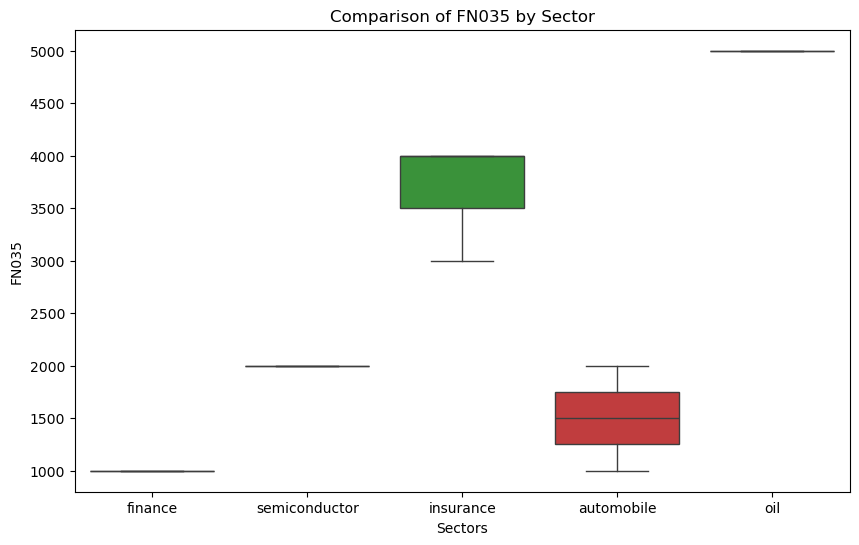

In [84]:
compare_by_sector(df, 'FN035')

In [ ]:
# the earnings data can be used to show how companies or sectors with higher ESG scores tend to outperform over time. 
# highlight companies with positive or negative momentum in their ESG scores.

In [ ]:
# method to identify rows with null values at specific columns


# List of columns you want to check for null values
columns_to_check = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']

# Identify rows where all specified columns have NaN values
null_rows = df[columns_to_check].isna().all(axis=1)

# Filter the DataFrame to show only those rows
rows_with_all_nulls = df[null_rows]

print(rows_with_all_nulls)
